# Isochrones

The Gaia paper that identifies cluster members: _Gaia Data Release 2 Observational Hertzsprung-Russell diagrams_ hereafter called [GaiaA](https://www.aanda.org/articles/aa/full_html/2018/08/aa32843-18/aa32843-18.html) includes this figure: [Figuer 17](https://www.aanda.org/articles/aa/full_html/2018/08/aa32843-18/F17.html)
which shows an isochrone fitted for a few of the paper’s  cluster membership lists.  Section 6 of the paper describes where the authors got the isochrones from and how they fitted them to the membership lists. Apparently the authors used a model called ‘PARSEC’ to get the isochrones as noted in a footnote:
>>
PARSEC isochrones in Gaia DR2 passbands are available at http://stev.oapd.inaf.it/cgi-bin/cmd.

In this notebook, we'll explore the use of this website and attempt to reproduce Figure 17.

There is a Python library interface to the above web service: https://github.com/mfouesneau/ezpadova which provides convenient access.  Using this interface, I was able to reproduce pretty faithfully (not perfectly, though) Figure 17 in the Gaia paper.


In [1]:
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

## EZPADOVA

The Python library interface to the isochrone web service is called `ezpadova`. Per the Readme file in the `ezpadova` GitHub [repo](https://github.com/mfouesneau/ezpadova), the library is installed as follows:
```
pip install git+git://github.com/mfouesneau/ezpadova
```

This installed error-free on both a Linux server and Windows laptop; however on the Windows laptop, the following import statement failed.  THis notebook was produced on the Linux server.

In [2]:
#import the parsec class
from ezpadova import parsec

In [3]:
#Per Readme file:
#get isocrhones for metalicity of 0.02 for years 1,000,000 through 10,000,000 in geometric increments of 1.1
r = parsec.get_t_isochrones(6.0, 7.0, 0.05, 0.02,model='parsec12s',  phot='gaiaDR2')

Interrogating http://stev.oapd.inaf.it...


In [4]:
r

,index,Z,log(age/yr),M_ini,M_act,logL/Lo,logTe,logG,mbol,G,G_BP,G_RP,int_IMF,stage
0,0,0.02,6.0,0.090000,0.0900,-1.3456,3.4324,3.4194,8.134,9.936,12.248,8.647,1.467654,0
1,1,0.02,6.0,0.100000,0.1000,-1.2483,3.4397,3.3970,7.891,9.622,11.853,8.344,1.570402,0
2,2,0.02,6.0,0.120000,0.1200,-1.0789,3.4522,3.3570,7.467,9.090,11.197,7.831,1.747825,0
3,3,0.02,6.0,0.140000,0.1400,-0.9457,3.4623,3.3310,7.134,8.684,10.705,7.439,1.895850,0
4,4,0.02,6.0,0.148254,0.1483,-0.8985,3.4661,3.3238,7.016,8.543,10.538,7.303,1.949946,0


These are the years for which the call above returned isochrones

In [5]:
np.unique(r['log(age/yr)'])

array([6.  , 6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 ,
       6.55, 6.6 , 6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95])

Plot the isochrones color-coded by age:

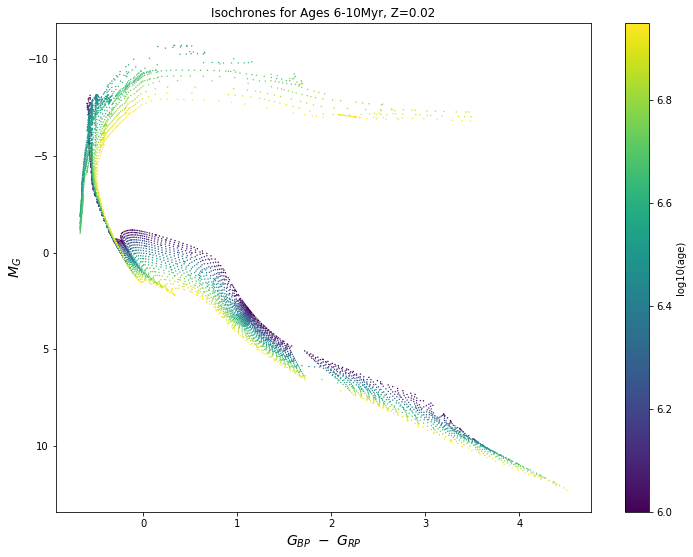

In [6]:
fig = plt.figure(figsize=(12,9))
ax=fig.add_subplot()
pcm = ax.scatter(r['G_BP']-r['G_RP'], r['G'], s=2, c=r['log(age/yr)'], edgecolor='None')
ax.invert_yaxis()
ax.set_title('Isochrones for Ages 6-10Myr, Z=0.02')

ax.set_ylabel('$M_G$',fontsize=14)
ax.set_xlabel('$G_{BP}\ -\ G_{RP}$', fontsize=14)

fig.colorbar(pcm,label='log10(age)')

## Isochrones for 0.5 B Years through 5.0 B Years

In [7]:
#Get the isochrones for the age range
years = np.linspace(0.5e9, 5e9,10).astype(int)
Z=0.017 # value used in Gaia Paper
isochrones = {}
for y in years:
    iso = parsec.get_one_isochrone(y, Z, model='parsec12s', phot='gaiaDR2')
    #just grab the photometry values
    isochrones[y]= {'G_BP': iso['G_BP'],
                     'G_RP': iso['G_RP'],
                     'G':    iso['G']}

Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...


Text(0.5, 0, '$G_{BP}\\ -\\ G_{RP}$')

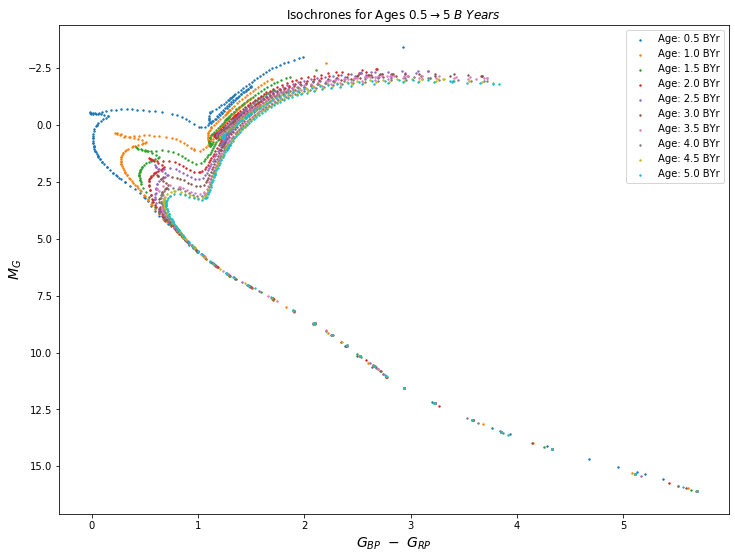

In [8]:
fig = plt.figure(figsize=(12,9))
ax=fig.add_subplot()

for y in years:
    iso = isochrones[y]
    #lstr = 'log($age$) = {}\n $Z$ = {}'.format(y, Z)
    lstr = f'Age: {float(y)/1e9:.1f} BYr'
    ax.scatter(iso['G_BP']-iso['G_RP'],iso['G'], s=2, label = lstr)
    
ax.set_title(f'Isochrones for Ages $0.5\\rightarrow 5\ B\ Years$')
ax.legend()
ax.invert_yaxis()
ax.set_ylabel('$M_G$',fontsize=14)
ax.set_xlabel('$G_{BP}\ -\ G_{RP}$', fontsize=14)


## Isochrones by Varying Z Values

In [9]:
#Get the isochrones for the age range
y = 1e9
Z_vals = np.linspace(0.015, 0.025, 10, endpoint=False)
isochrones = {}
for Z in Z_vals:
    iso = parsec.get_one_isochrone(y, Z, model='parsec12s', phot='gaiaDR2')
    #just grab the photometry values
    isochrones[Z]= {'G_BP': iso['G_BP'],
                     'G_RP': iso['G_RP'],
                     'G':    iso['G']}

Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...


Text(0.5, 0, '$G_{BP}\\ -\\ G_{RP}$')

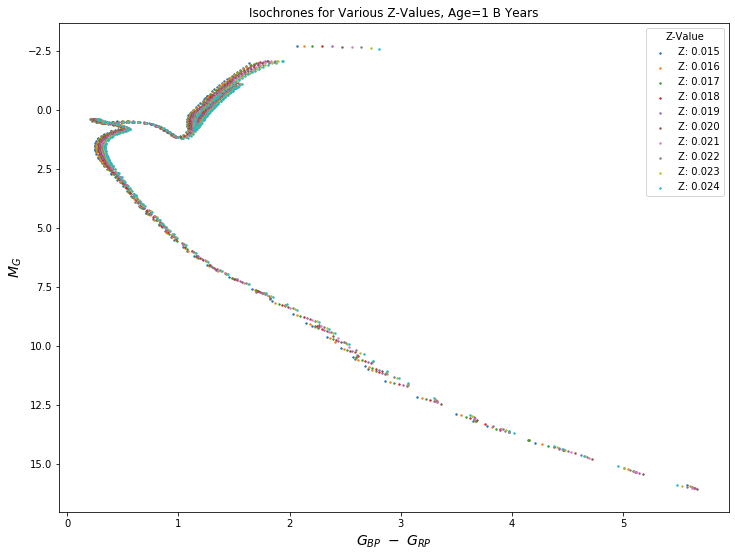

In [10]:
fig = plt.figure(figsize=(12,9))
ax=fig.add_subplot()

for Z in Z_vals:
    iso = isochrones[Z]
    #lstr = 'log($age$) = {}\n $Z$ = {}'.format(y, Z)
    lstr = f'Z: {Z:.3f}'
    ax.scatter(iso['G_BP']-iso['G_RP'],iso['G'], s=2, label = lstr)
    
ax.set_title(f'Isochrones for Various Z-Values, Age=1 B Years')
ax.legend(title='Z-Value')
ax.invert_yaxis()
ax.set_ylabel('$M_G$',fontsize=14)
ax.set_xlabel('$G_{BP}\ -\ G_{RP}$', fontsize=14)

## Isochrones for 9 Nearby Open Clusters

In [11]:
import sys
sys.path.append('../locate_cluster_outliers/src')
from gaiastars import gaiastars as gs

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [12]:
import astropy.coordinates as coord
from astropy.table import QTable, Table, vstack

import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia
from astroquery.simbad import Simbad
import pandas as pd
import numpy as np
import pickle
import os

### Get Simbad Catalog Info for Clusters

In [13]:
#Open Cluster list. (We're only interested in 9 nearby clusters, however)
clusters = ['Blanco 1',
 'Collinder 140',
 'Coma Berenices Cluster',
 'Hyades',
 'IC 2391',
 'IC 2602',
 'IC 4665',
 'NGC 2232',
 'NGC 2422',
 'NGC 2451A',
 'NGC 2516',
 'NGC 2547',
 'NGC 3532',
 'NGC 6475',
 'NGC 6633',
 'NGC 7092',
 'Pleiades',
 'Praesepe',
 'alpha Per']

In [14]:
# set up the Simbad query
from astroquery.simbad import Simbad
from astropy.time import Time
mySimbad = Simbad()
mySimbad.add_votable_fields('parallax', 'pm','velocity','typed_id')
mySimbad.get_votable_fields()


['main_id', 'coordinates', 'parallax', 'pm', 'velocity', 'typed_id']

In [15]:
#from astropy.table import Table, vstack
res_table = vstack([mySimbad.query_object(c) for c in clusters],join_type='exact')


In [16]:
#fix the Simbad result to a more usable form
cluster_info=Table(res_table['TYPED_ID', 'PLX_VALUE', 'PLX_PREC','RA', 'RA_PREC', 'DEC', 'DEC_PREC',
                            'PMRA', 'PMDEC', 'RVZ_RADVEL', 'RVZ_ERROR'])

#gotta be a better way to do this:
cluster_info['TYPED_ID'] = [c.decode('utf-8') for c in cluster_info['TYPED_ID']]

#rename the columns to look like Gaia
cluster_info.rename_column('TYPED_ID','cluster')
cluster_info.rename_column('PLX_VALUE','parallax')
cluster_info.rename_column('PLX_PREC', 'parallax_error')
cluster_info.rename_column('RA', 'ra')
cluster_info.rename_column('RA_PREC','ra_error')
cluster_info.rename_column('DEC', 'dec')
cluster_info.rename_column('DEC_PREC','dec_error')
cluster_info.rename_column('PMRA', 'pmra')
cluster_info.rename_column('PMDEC', 'pmdec')
cluster_info.rename_column('RVZ_RADVEL','radial_velocity')
cluster_info.rename_column('RVZ_ERROR', 'rv_error')

#unmask the columns
cluster_info = cluster_info.filled() 


#index on the cluster name
cluster_info.add_index('cluster')

# coordinates,  note the update to J2015.5 to match with Gaia
cluster_info['coords'] = \
    SkyCoord(ra = cluster_info['ra'],
        dec = cluster_info['dec'], unit = (u.hour, u.deg),
        obstime = 'J2000',  #simbad returns J2000 coords
        distance = coord.Distance(parallax=Quantity(cluster_info['parallax'])),
        pm_ra_cosdec = cluster_info['pmra'],
        pm_dec = cluster_info['pmdec'],
        radial_velocity = cluster_info['radial_velocity']).apply_space_motion(new_obstime=Time('2015.5',format='decimalyear'))

In [17]:
cluster_info.loc['Pleiades']

cluster,parallax,parallax_error,ra,ra_error,dec,dec_error,pmra,pmdec,radial_velocity,rv_error,coords
,mas,,"""h:m:s""",,"""d:m:s""",,mas / yr,mas / yr,km / s,km / s,"deg,deg,pc"
str22,float64,int16,str13,int16,str13,int16,float64,float64,float64,float32,object
Pleiades,7.364,3,03 47 00,4,+24 07.0,4,19.997,-45.548,5.650,0.090,"56.75009432548025,24.11647057028541,135.7958527032827"


### Cluster Membership List

In [18]:
#Get the cluster membership list from the study
members = pd.read_csv('ftp://cdsarc.u-strasbg.fr/pub/cats/J/A+A/616/A10/tablea1a.dat',
                      delim_whitespace=True,
                      header=None, index_col=None,
                      names = ['SourceID', 'Cluster', 'RAdeg', 'DEdeg', 'Gmag', 'plx', 'e_plx'])
members.set_index('SourceID', inplace=True)

In [19]:
#create map to Simbad cluster names
cluster_names = members.Cluster.unique()
cluster_names

array(['Hyades', 'ComaBer', 'Pleiades', 'Praesepe', 'alphaPer', 'IC2391',
       'IC2602', 'Blanco1', 'NGC2451'], dtype=object)

In [20]:
# mapper to map the Simbad names to those of the datafile
name_mapper = { 'Hyades':'Hyades',
                'Coma Berenices Cluster':'ComaBer',
                'Pleiades':'Pleiades',
                'Praesepe':'Praesepe',
                'alpha Per':'alphaPer',
                'IC 2391':'IC2391', 
                'IC 2602':'IC2602', 
                'Blanco 1':'Blanco1',
                'NGC 2451A':'NGC2451'}

In [21]:
#fix up the names in the cluster info table
for cl in name_mapper:
    cluster_info.loc[cl]['cluster'] = name_mapper[cl]

###  Get Table 2 Cluster Data

In [22]:
table2 = pd.read_csv('~/Cas-Tau/data/2018A+A___616A__10G/Table2.csv')
table2.rename(columns={'Cluster':'cluster'}, inplace=True)

#need this as astropy table
table2_t = Table.from_pandas(table2)
table2_t.add_index('cluster')
table2_t[0:5]

cluster,DM,log_age,Fe_H,e_b_minus_v,NMembers
str8,float64,float64,float64,float64,int64
Hyades,3.389,8.9,0.13,0.001,480
ComaBer,4.669,8.81,0.0,0.0,127
Pleiades,5.667000000000001,8.04,-0.01,0.045,1059
IC2391,5.9079999999999995,7.7,-0.01,0.03,254
IC2602,5.914,7.6,-0.02,0.031,391


In [23]:
from astropy.table import join

# paste the table 2 data onto the cluster info table

#use default inner join join_type to eliminate cluster not of interest
cluster_info = join(cluster_info, table2_t)
cluster_info.add_index('cluster')

#put on the Z values (see Gaia Paper Section 6)
cluster_info['Z'] = 0.017
for cl in ['Praesepe','Hyades','alphaPer']:
    cluster_info.loc[cl]['Z'] = 0.020
    
cluster_info

cluster,parallax,parallax_error,ra,ra_error,dec,dec_error,pmra,pmdec,radial_velocity,rv_error,coords,DM,log_age,Fe_H,e_b_minus_v,NMembers,Z
,mas,,"""h:m:s""",,"""d:m:s""",,mas / yr,mas / yr,km / s,km / s,"deg,deg,pc",,,,,,
str22,float64,int16,str13,int16,str13,int16,float64,float64,float64,float32,object,float64,float64,float64,float64,int64,float64
Blanco1,4.216,3,00 04 07,4,-29 50.0,4,18.724,2.650,5.780,0.100,"1.029259593544724,-29.833321924337177,237.19174246002012",6.876,8.06,0.03,0.01,361,0.017
ComaBer,11.640,3,12 25 06.00,6,+26 06 00.0,6,-12.111,-8.996,-0.520,0.070,"186.27494193817012,26.099961269767117,85.91064467749707",4.669,8.81,0.0,0.0,127,0.017
Hyades,21.052,3,04 26 54.00,6,+15 52 00.0,6,104.920,-28.000,39.960,0.060,"66.72546959401939,15.866546120181058,47.50205839190105",3.389,8.9,0.13,0.001,480,0.02
IC2391,6.597,3,08 40 32,4,-53 02.0,4,-24.927,23.256,14.590,0.090,"130.13315487316234,-53.033233209971144,151.5842846025466",5.9079999999999995,7.7,-0.01,0.03,254,0.017
IC2602,6.571,3,10 42 58,4,-64 24.0,4,-17.783,10.655,17.430,0.110,"160.74148947876645,-64.39995412731444,152.18411434540482",5.914,7.6,-0.02,0.031,391,0.017
NGC2451,5.165,3,07 43 12,4,-38 24.0,4,-21.116,15.328,27.700,0.500,"115.79988399825014,-38.39993400889923,193.61128124453285",6.433,7.78,-0.08,0.0,311,0.017
Pleiades,7.364,3,03 47 00,4,+24 07.0,4,19.997,-45.548,5.650,0.090,"56.75009432548025,24.11647057028541,135.7958527032827",5.667000000000001,8.04,-0.01,0.045,1059,0.017
Praesepe,5.371,3,08 40 24,4,+19 40.0,4,-36.047,-12.917,34.720,0.080,"130.09983519474272,19.666611055570947,186.18561824265458",6.35,8.85,0.16,0.027000000000000003,771,0.02


### Get the Isochrone for Each Cluster

In [24]:
## Get the Isochrone for Each Cluster, using Age and Z values from cluster_info (which are from Table 2)
isochrones = {}
for cl in cluster_names:
    c = cluster_info.loc[cl]
    a=10.0**c['log_age']
    iso = parsec.get_one_isochrone(a, c['Z'], model='parsec12s', phot='gaiaDR2')
    #just grab the photometry values
    isochrones[cl]= {'G_BP': iso['G_BP'],
                     'G_RP': iso['G_RP'],
                     'G':    iso['G']}

Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...
Interrogating http://stev.oapd.inaf.it...


### Get the Gaia Records for Each Clusters' Members

In [25]:
# Fetch up the Gaia records for all of the cluster members, each cluster at a time
members_gaia = {}
for cl in cluster_names:
    true_members = list(members.query('Cluster == @cl').index)
    members_gaia[cl] = gs(name=f'from Gaia: {cl}')
    members_gaia[cl].from_source_idlist(true_members)

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


## Plot HR Diagram with Isochrone

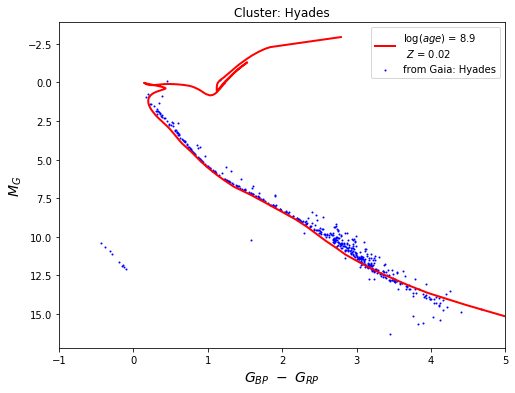

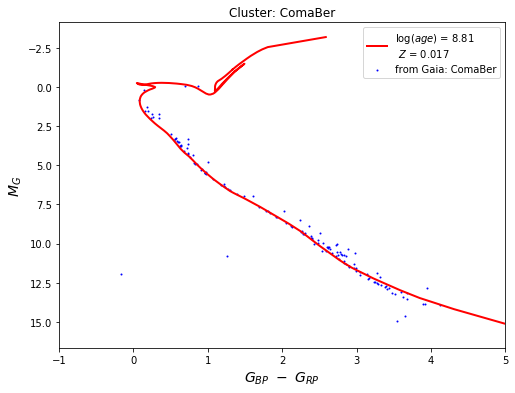

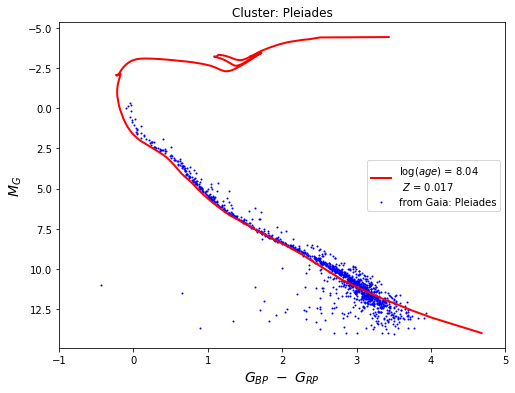

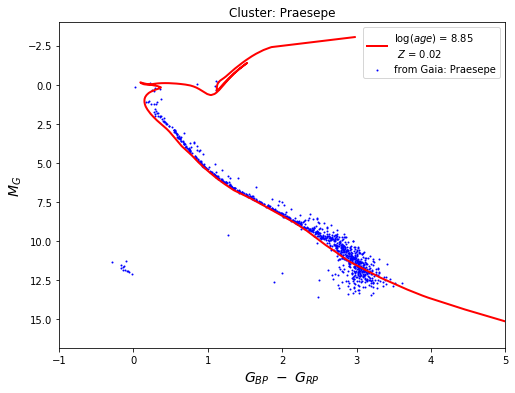

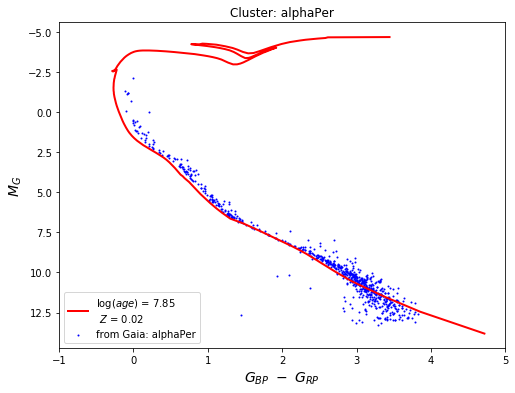

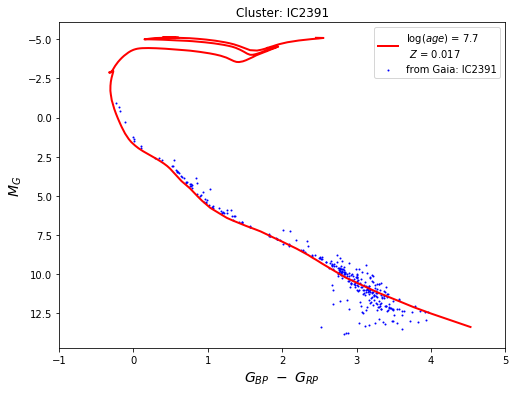

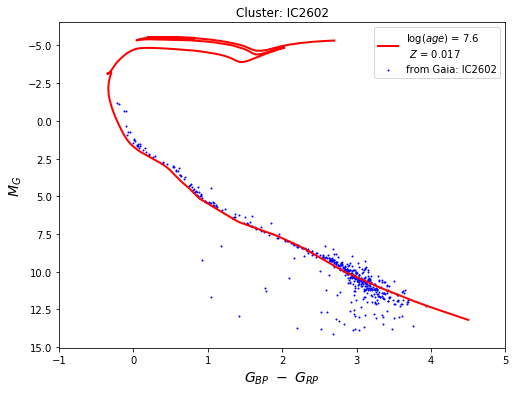

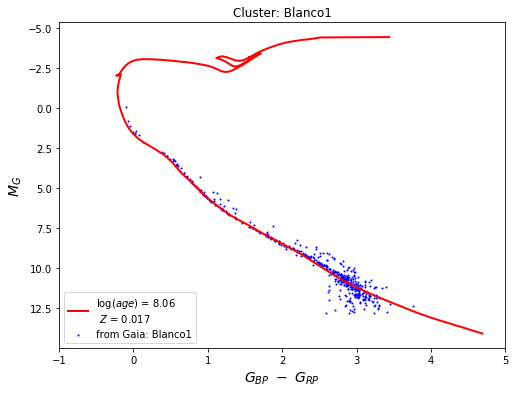

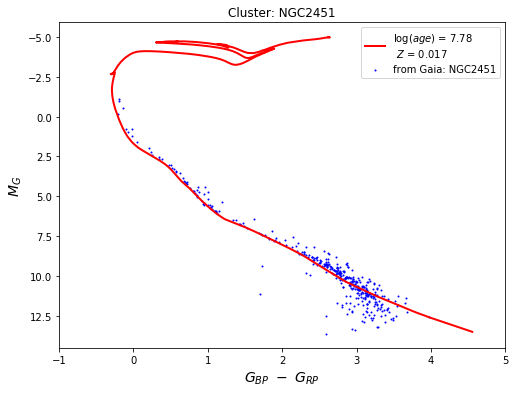

In [26]:
for cl in cluster_names:

    fig = plt.figure(figsize=(8,6))
    ax=fig.add_subplot()

    members_gaia[cl].plot_hrdiagram(ax=ax, label=None)
    iso = isochrones[cl]
    lstr = 'log($age$) = {}\n $Z$ = {}'.format(*cluster_info.loc[cl][['log_age','Z']])
    ax.plot(iso['G_BP']-iso['G_RP'],iso['G'], lw=2, color='red', label = lstr)
    ax.set_title(f'Cluster: {cl}')
    ax.legend()


## PARSEC Help

In [27]:
#Different photometry systems supported (valid values for the phot parameter)
parsec.help_phot()

phot "2mass_spitzer":
    2MASS + Spitzer (IRAC+MIPS)

phot "2mass_spitzer_wise":
    2MASS + Spitzer (IRAC+MIPS) + WISE

phot "2mass":
    2MASS JHK

phot "ubvrijhk":
   UBVRIJHK (cf. Maiz-Apellaniz 2006 + Bessell 1990)

phot "bessell":
   UBVRIJHKLMN (cf. Bessell 1990 + Bessell & Brett 1988)

phot "akari":
   AKARI

phot "batc":
   BATC

phot "megacam":
   CFHT/Megacam pre-2014 u*g'r'i'z'

phot "dcmc":
   DCMC

phot "denis":
   DENIS

phot "dmc14":
   DMC 14 filters

phot "dmc15":
   DMC 15 filters

phot "eis":
   ESO/EIS (WFI UBVRIZ + SOFI JHK

phot "wfi":
   ESO/WFI

phot "wfi_sofi":
   ESO/WFI+SOFI

phot "wfi2":
   ESO/WFI2

phot "galex":
   GALEX FUV+NUV + Johnson's UBV (Maiz-Apellaniz version), all Vegamags

phot "galex_sloan":
   GALEX FUV+NUV (Vegamag) + SDSS ugriz (ABmags) 

phot "UVbright":
   HST+GALEX+Swift/UVOT UV filters

phot "acs_hrc":
   HST/ACS HRC

phot "acs_wfc":
   HST/ACS WFC

phot "nicmosab":
   HST/NICMOS AB

phot "nicmosst":
   HST/NICMOS ST

phot "nicmosvega"

In [28]:
#supported isochrone models
parsec.help_models()

model "parsec12s_r14":
   PARSEC version 1.2S Bressan et al. (2012), Tang et al. (2014),  Chen et al. (2014) with COLIBRI TP-AGB Marigo et al. (2013), Rosenfield et al. (2014, 2016)

model "parsec12s":
   PARSEC version 1.2S,  Bressan et al. (2012), Tang et al. (2014),  Chen et al. (2014)

model "parsec11":
   PARSEC version 1.1, With revised diffusion+overshooting in low-mass stars, and improvements in interpolation scheme.

model "parsec10":
   PARSEC version 1.0

model "2010":
   Marigo et al. (2008) with the Girardi et al. (2010) Case A correction for low-mass, low-metallicity AGB tracks

model "2010b":
   Marigo et al. (2008) with the Girardi et al. (2010) Case B correction for low-mass, low-metallicity AGB tracks

model "2008":
   Marigo et al. (2008): Girardi et al. (2000) up to early-AGB + detailed TP-AGB from Marigo & Girardi (2007) (for M <= 7 Msun) + Bertelli et al. (1994) (for M > 7 Msun) + additional Z=0.0001 and Z=0.001 tracks.

model "2002":
   Basic set of Girardi et al